In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv("../data/cleaned_data/ratings_clean.csv")
movies = pd.read_csv("../data/cleaned_data/movies_genres_clean.csv")

ratings["year"] = pd.to_datetime(ratings["timestamp"]).dt.year

In [2]:
movies.head()

,movieId,title,genres,release_year,clean_title,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Toy Story,Adventure
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Toy Story,Animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Toy Story,Children
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Toy Story,Comedy
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Toy Story,Fantasy


In [3]:
ratings_genres = ratings.merge(
    movies[["movieId", "genre_list"]],
    on="movieId",
    how="inner"
)

In [4]:
ratings_by_year_genre = (
    ratings_genres
    .groupby(["year", "genre_list"])
    .size()
    .reset_index(name="num_ratings")
)


In [5]:
total_per_year = (
    ratings_by_year_genre
    .groupby("year")["num_ratings"]
    .sum()
    .reset_index(name="total_ratings")
)

ratings_pct = ratings_by_year_genre.merge(
    total_per_year,
    on="year"
)

ratings_pct["pct_ratings"] = (
    ratings_pct["num_ratings"] /
    ratings_pct["total_ratings"]
)


In [6]:
top_genres = (
    ratings_genres["genre_list"]
    .value_counts()
    .head(5)
    .index
)

ratings_pct = ratings_pct[
    ratings_pct["genre_list"].isin(top_genres)
]


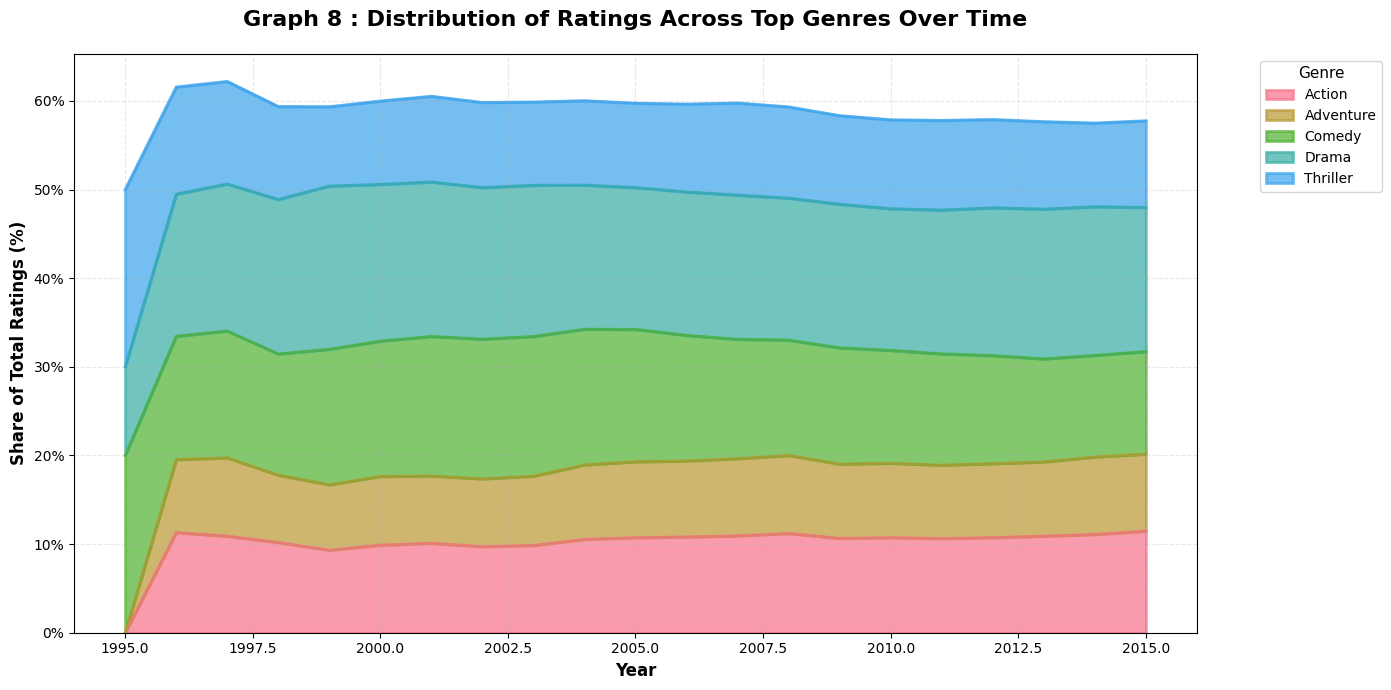

In [7]:
import seaborn as sns

sns.set_palette("husl")

pivot_df = ratings_pct.pivot(
    index="year",
    columns="genre_list",
    values="pct_ratings"
).fillna(0)

fig, ax = plt.subplots(figsize=(14, 7))

pivot_df.plot(
    kind="area",
    ax=ax,
    alpha=0.7,
    linewidth=2
)

ax.set_title("Graph 8 : Distribution of Ratings Across Top Genres Over Time", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12, fontweight='bold')
ax.set_ylabel("Share of Total Ratings (%)", fontsize=12, fontweight='bold')
ax.legend(title="Genre", title_fontsize=11, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, linestyle='--')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

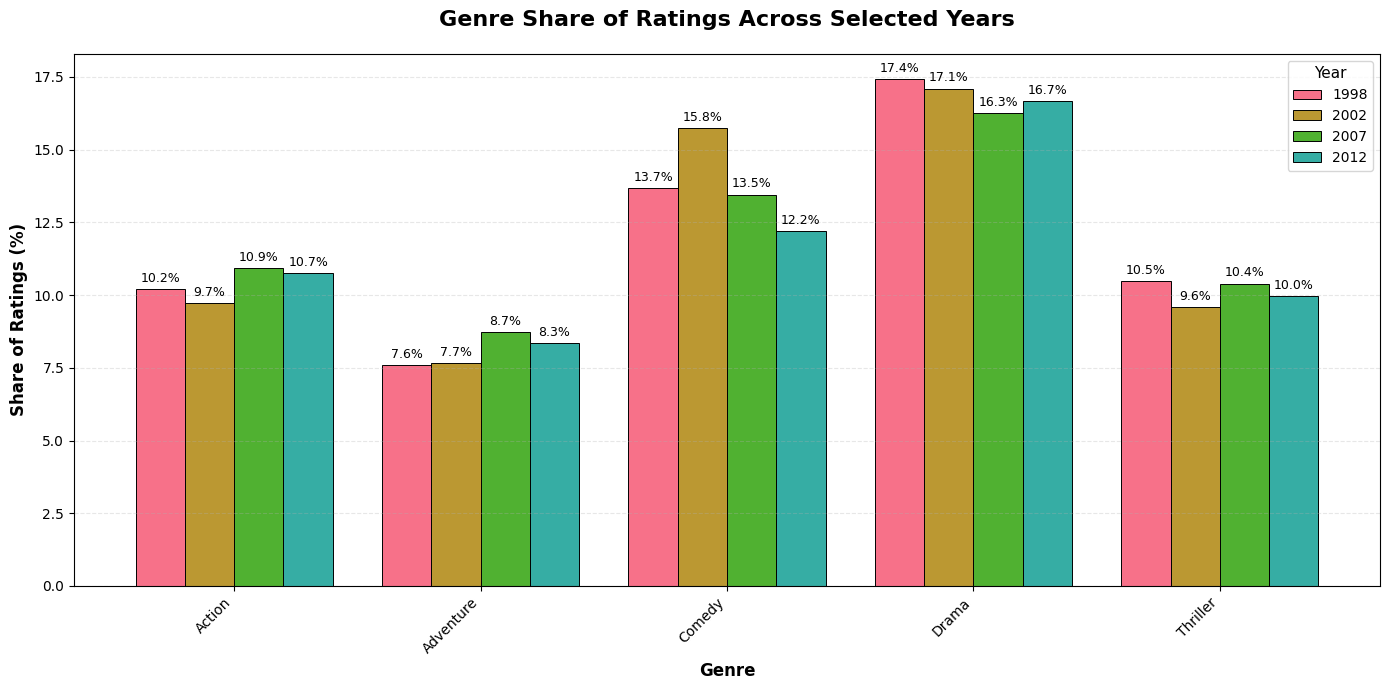

In [8]:
import seaborn as sns

selected_years = [1998, 2002, 2007, 2012]

bar_df = ratings_pct[
    ratings_pct["year"].isin(selected_years)
]

pivot_bar = bar_df.pivot(
    index="genre_list",
    columns="year",
    values="pct_ratings"
) * 100

fig, ax = plt.subplots(figsize=(14, 7))

pivot_bar.plot(
    kind="bar",
    ax=ax,
    width=0.8,
    edgecolor='black',
    linewidth=0.7
)

ax.set_title("Genre Share of Ratings Across Selected Years", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Genre", fontsize=12, fontweight='bold')
ax.set_ylabel("Share of Ratings (%)", fontsize=12, fontweight='bold')
ax.legend(title="Year", title_fontsize=11, fontsize=10)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

plt.tight_layout()
plt.show()